In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [21]:
start = str(input('Start date(yyyy-mm-dd): '))
end = str(input('End date(yyyy-mm-dd): '))

df=data.DataReader('GOOGL','yahoo',start,end)

In [22]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659096.0,50.220219
2004-08-20,54.594597,50.300301,50.555557,54.209209,22834343.0,54.209209
2004-08-23,56.796799,54.579578,55.430431,54.754753,18256126.0,54.754753
2004-08-24,55.855858,51.836838,55.675674,52.487488,15247337.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188602.0,53.053055


In [23]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,52.082081,48.028027,50.050049,50.220219,44659096.0,50.220219
1,2004-08-20,54.594597,50.300301,50.555557,54.209209,22834343.0,54.209209
2,2004-08-23,56.796799,54.579578,55.430431,54.754753,18256126.0,54.754753
3,2004-08-24,55.855858,51.836838,55.675674,52.487488,15247337.0,52.487488
4,2004-08-25,54.054054,51.991993,52.532532,53.053055,9188602.0,53.053055


In [24]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,52.082081,48.028027,50.050049,50.220219,44659096.0
1,54.594597,50.300301,50.555557,54.209209,22834343.0
2,56.796799,54.579578,55.430431,54.754753,18256126.0
3,55.855858,51.836838,55.675674,52.487488,15247337.0
4,54.054054,51.991993,52.532532,53.053055,9188602.0


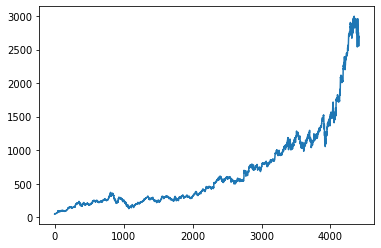

In [25]:
plt.plot(df.Close)

In [32]:
ma100=df.Close.rolling(100).mean() #Moving Average
ma100
ma200=df.Close.rolling(200).mean() #Moving Average

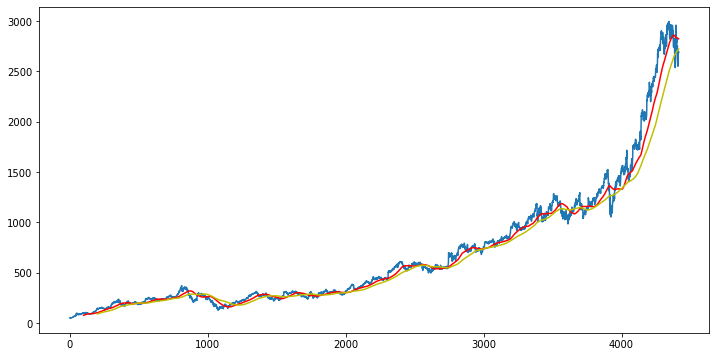

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'y')

In [38]:
df.shape

(4415, 5)

In [51]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.shape

(3090, 1)

In [53]:
data_testing.shape

(1325, 1)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [57]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[2.10217786e-04],
       [5.28730479e-03],
       [5.98165904e-03],
       ...,
       [9.35164848e-01],
       [9.35419418e-01],
       [9.27782769e-01]])

In [58]:
data_training_array.shape

(3090, 1)

In [60]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [62]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [63]:
x_train.shape

(2990, 100, 1)

In [69]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [71]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [73]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
94/94 [==============================] - 18s 151ms/step - loss: 0.0237
Epoch 2/50
94/94 [==============================] - 13s 140ms/step - loss: 0.0068
Epoch 3/50
94/94 [==============================] - 12s 132ms/step - loss: 0.0053
Epoch 4/50
94/94 [==============================] - 15s 156ms/step - loss: 0.0052
Epoch 5/50
94/94 [==============================] - 17s 176ms/step - loss: 0.0047
Epoch 6/50
94/94 [==============================] - 14s 145ms/step - loss: 0.0049
Epoch 7/50
94/94 [==============================] - 13s 134ms/step - loss: 0.0048
Epoch 8/50
94/94 [==============================] - 13s 134ms/step - loss: 0.0040
Epoch 9/50
94/94 [==============================] - 13s 135ms/step - loss: 0.0036
Epoch 10/50
94/94 [==============================] - 13s 135ms/step - loss: 0.0038
Epoch 11/50
94/94 [==============================] - 13s 134ms/step - loss: 0.0031
Epoch 12/50
94/94 [==============================] - 13s 135ms/step - loss: 0.0032
Epoch 13/50
9

In [75]:
model.save('Keras_model.h5')

In [76]:
data_testing.head()

,Close
3090,780.229980
3091,785.789978
3092,789.440002
3093,775.880005
3094,764.330017


In [77]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

C:\Users\Chirubhai\AppData\Local\Temp\ipykernel_3728\2523080795.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


,Close
0,708.969971
1,707.260010
2,717.780029
3,727.200012
4,732.510010


In [78]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(1425, 1)

In [79]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [80]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1325, 100, 1)
(1325,)


In [81]:
y_predicted=model.predict(x_test)

In [82]:
scaler.scale_

array([0.00043677])

In [83]:
scale_factor=1/0.00043677
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

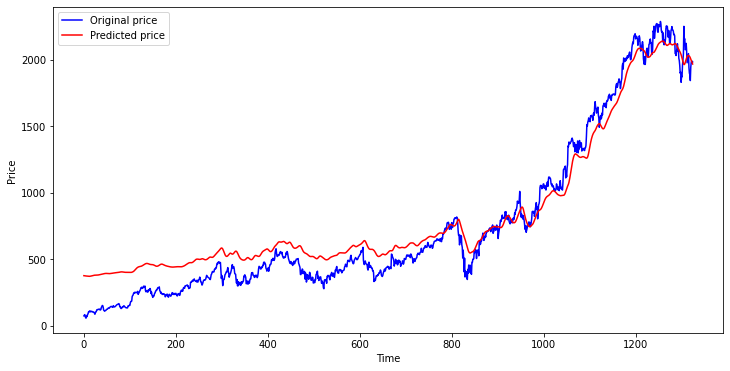

In [84]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()